In [57]:
import numpy as np
import matplotlib.pyplot as plt


## Read Data

In [58]:
filename = 'comsol_ex2_time_data.txt'
data = np.loadtxt(filename,comments ='%')

In [59]:
nrows, ncols = data.shape
print('rows:',nrows)
print('columns:',ncols)

rows: 2500
columns: 5


In [60]:
x = np.unique(data[:,0]) 
y = np.unique(data[:,1]) 
len(x)
np.amax(x)

0.09999999999999999

In [61]:
all_x_spacing = np.diff(x)
all_y_spacing = np.diff(y)

x_spacing = all_x_spacing[0]
y_spacing = all_y_spacing[0]

len(all_x_spacing)

49

In [62]:
np.allclose(all_x_spacing, x_spacing),np.allclose(all_y_spacing, y_spacing)

(True, True)

In [63]:
xx, yy = np.meshgrid(x,y)
T_start = np.zeros_like(xx)
T_mid = np.zeros_like(xx)
T_end = np.zeros_like(xx)

for row in data:
    T_start_value = row[2]
    T_mid_value = row[3]
    T_end_value = row[4]
    
    x_values = row[0] - x_spacing/2

    y_values = row[1] - y_spacing/2
    
    i = int(x_values/x_spacing)
    j = int(y_values/y_spacing)
    
    T_start[j,i] = T_start_value
    T_mid[j,i] = T_mid_value
    T_end[j,i] = T_end_value

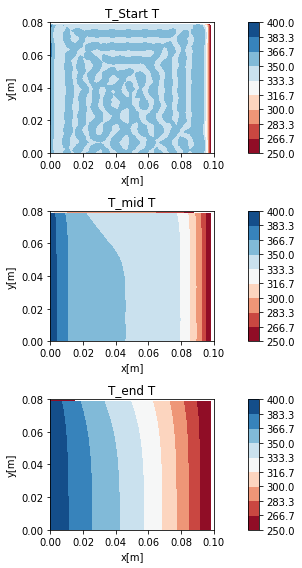

In [72]:
fig, (ax0, ax1,ax2) = plt.subplots(nrows =3 , figsize = (10,8))
levels = np.linspace(250,400,10)

cf = ax0.contourf(xx,yy,T_start,cmap='RdBu', levels=levels)
#ax0.set(xlim = (0,.1), ylim = (0,0.08), xlabel = 'x[m]', ylabel = 'y[m]', title = 'displacement U', aspect = 'equal')
ax0.set(xlabel = 'x[m]', ylabel = 'y[m]', title = 'T_Start T', aspect = 'equal')
plt.colorbar(cf, ax = ax0, aspect = 12)

cf = ax1.contourf(xx,yy,T_mid,cmap='RdBu', levels=levels)
#ax1.set(xlim = (0,.1), ylim = (0,0.08), xlabel = 'x[m]', ylabel = 'y[m]', title = 'displacement V', aspect = 'equal')
ax1.set(xlabel = 'x[m]', ylabel = 'y[m]', title = 'T_mid T', aspect = 'equal')
plt.colorbar(cf, ax = ax1, aspect = 12)

cf = ax2.contourf(xx,yy,T_end,cmap='RdBu', levels=levels)
#ax2.set(xlim = (0,.1), ylim = (0,0.08), xlabel = 'x[m]', ylabel = 'y[m]', title = 'displacement V', aspect = 'equal')
ax2.set(xlabel = 'x[m]', ylabel = 'y[m]', title = 'T_end T', aspect = 'equal')
plt.colorbar(cf, ax = ax2, aspect = 12)
plt.tight_layout()
plt.show(fig)